# Linear Regression using packages

Here we study some different types of regression to explore a database and build prediction engines.

## Concrete Strength Database

Now lets examine the concrete database again and see what kind of prediction engine we can come up with.

```
## Activate/deactivate to generate needed code

#Get database -- use the Get Data From URL Script
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls' # an Excel file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('concreteData.xls', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection
```

Import/install support packages (if install required, either on your machine, or contact network admin to do a root install)

In [200]:
# The usual suspects plus some newish ones!
### Import/install support packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now try to read the file, use pandas methods

In [201]:
data = pd.read_excel("concreteData.xls")

In [202]:
len(data)

1030

In [203]:
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

Rename the columns to simpler names, notice use of a set constructor.
Once renamed, again look at the first few rows

In [204]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

data.head()

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CC_Strength  
0          676.0   28    79.986111  
1          676.0   28    61.887366  
2          594.0  270    40.269535  
3          594.0  365    41.052780  
4          825.5  360    44.296075

Let us check the correlations between the input features, this will give an idea about how each variable is affecting all other variables. 

A pairwise plot is a useful graphical step that lets explore relationships between database fields for all records.

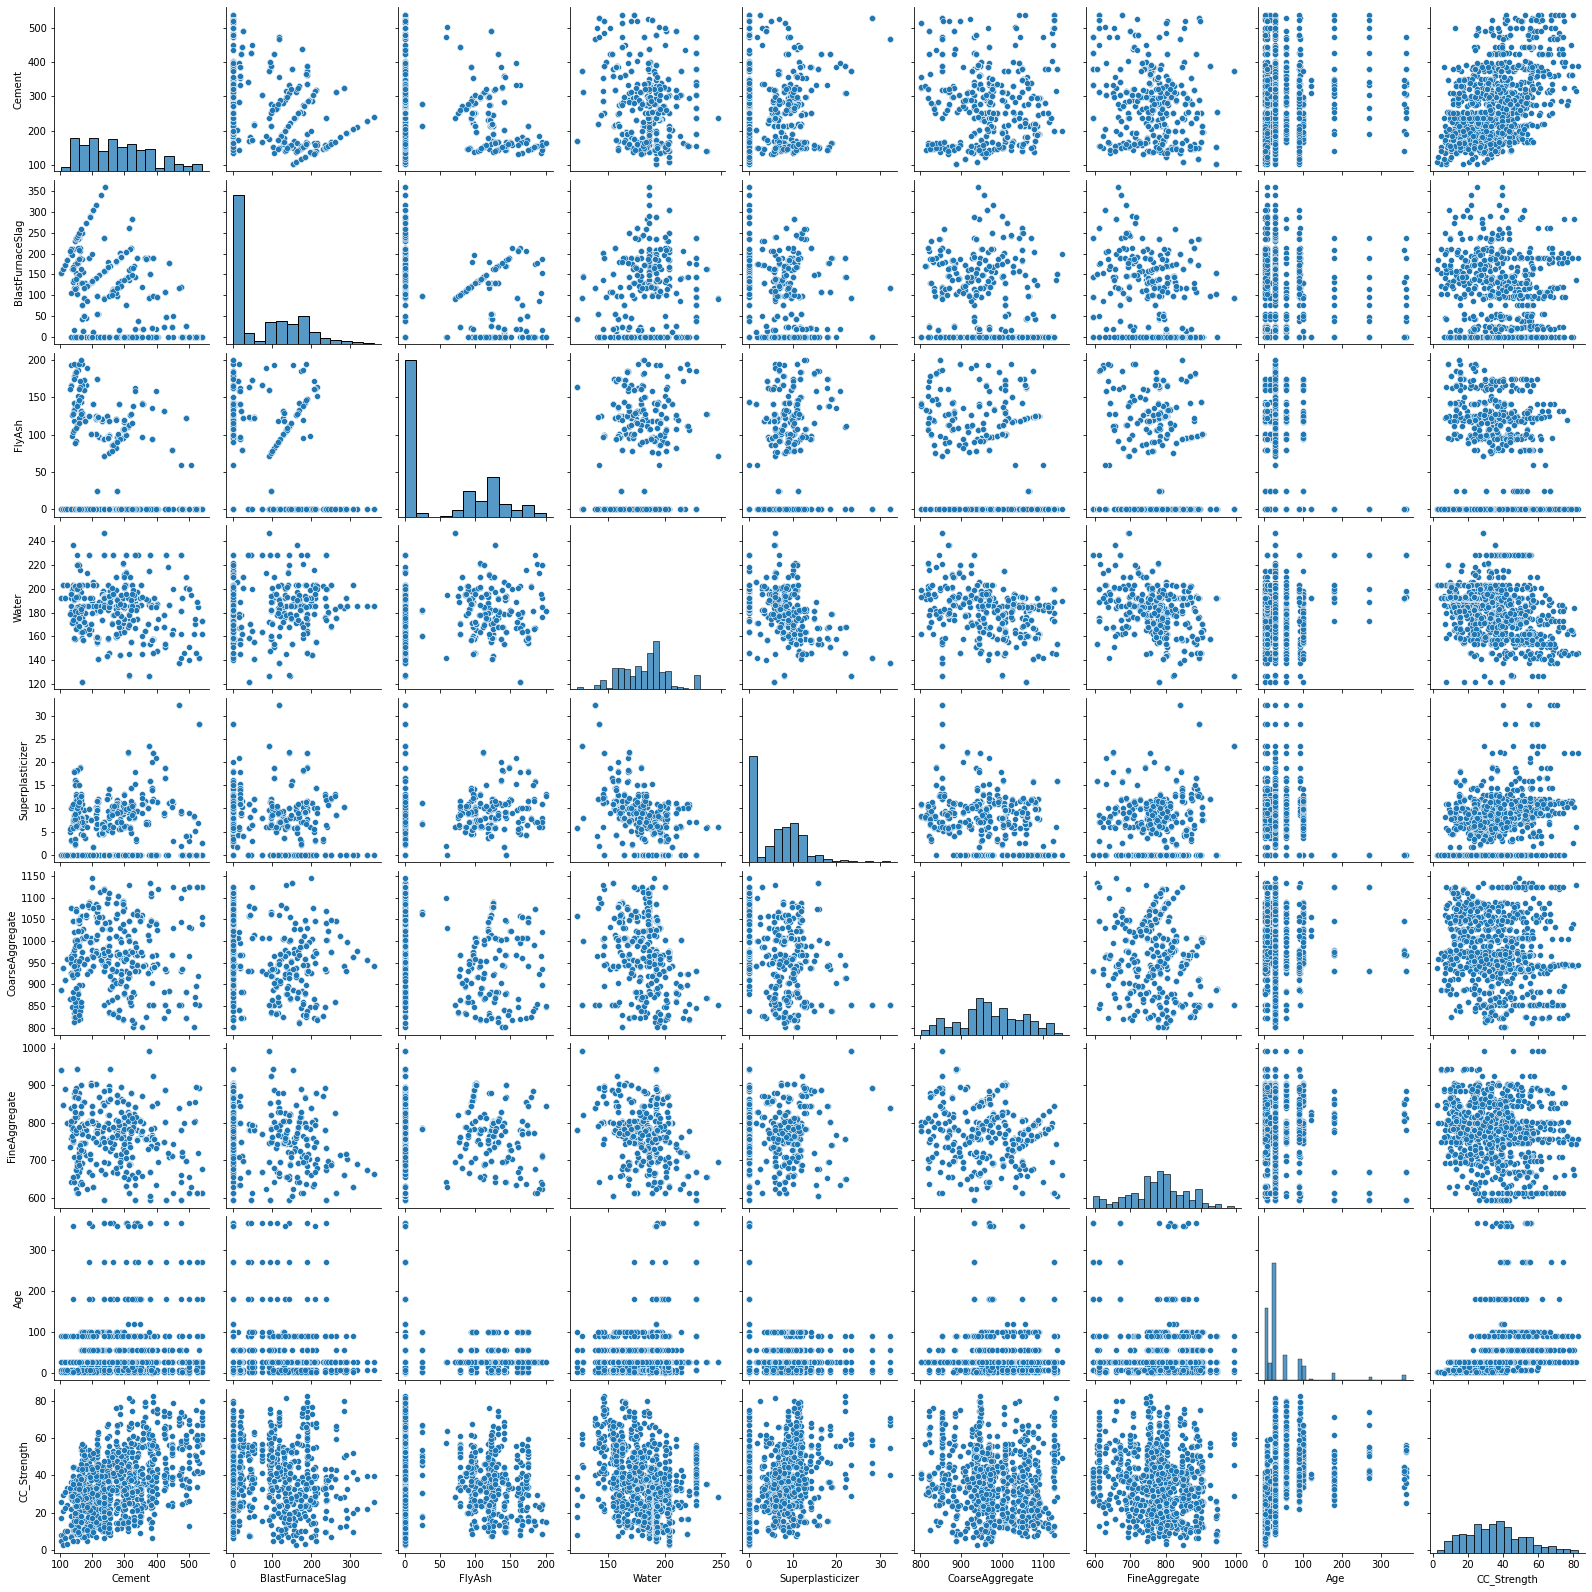

In [205]:
sns.pairplot(data)
plt.show()

The last row of this plot is informative it shows the relationship of strength to different proportions of components as well as a distribution of strength. There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the Pearson Correlation coefficients between the features.
Here we use a heatmap, which will display the correlation coefficient for each variable pair.  A variable is always self-correlated so those value will be 1.0

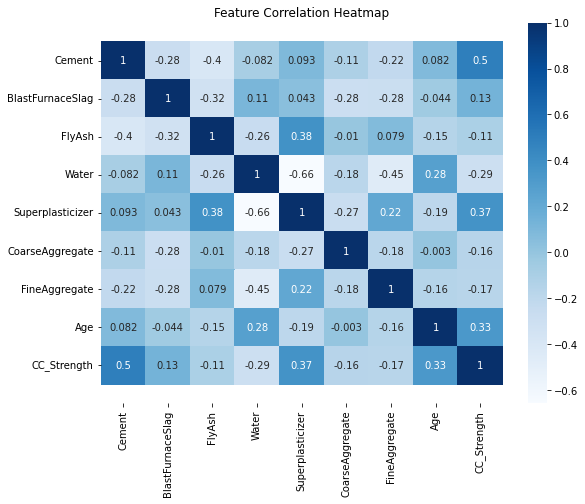

In [206]:
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Preprocessing

Here we will do some learn dammit stuff.  First lets prepare the dataframe a bit.

Our **Target** is Compressive Strength, the **Features** are all the other creatures!

### Separating Input Features and Target Variable.

Do list slices to create a "design matrix" and a "target vector"

In [207]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

#print(X.head(),'\n')
#print(y.head())

```
# Alternate
X = data.iloc[:,[i for i in range(0,7)]]         # Features - All columns but last
y = data.iloc[:,8]          # Target - Last Column

print(X.head(),'\n')
print(y.head())
```

### Splitting data into Training and Test splits.

Take dataframe and randomly split a portion out for training and testing.  Convention varies but below 20\% is reserved  for the testing.

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Scaling

Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [209]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

## Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.
### Linear Regression

The Go-to method for Regression problems.
The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.
The objective function used in this case is Mean Squared Error.
There are three common versions of Linear Regression

1) Linear Regression - No regularisation

2) Lasso Regression - L1 regularisation (Tries to push coefficients to zero)

3) Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)

We will compare these three algorithms

### LASSO Regression
:::{note}
*From Wikipedia*

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. It was originally introduced in geophysics, and later by Robert Tibshirani, who coined the term.

Lasso was originally formulated for linear regression models. This simple case reveals a substantial amount about the estimator. These include its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates do not need to be unique if covariates are collinear.

Though originally defined for linear regression, lasso regularization is easily extended to other statistical models including generalized linear models, generalized estimating equations, proportional hazards models, and M-estimators. Lasso's ability to perform subset selection relies on the form of the constraint and has a variety of interpretations including in terms of geometry, Bayesian statistics and convex analysis. 

...

*interpret the linear algebra here*
:::

[Lasso API notes](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

### Ridge Regression

:::{note}
*From Wikipedia*

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It has been used in many fields including econometrics, chemistry, and engineering. Also known as Tikhonov regularization, named for Andrey Tikhonov, it is a method of regularization of ill-posed problems; it is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters. In general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias (see bias–variance tradeoff).

The theory was first introduced by Hoerl and Kennard in 1970 in their Technometrics papers “RIDGE regressions: biased estimation of nonorthogonal problems” and “RIDGE regressions: applications in nonorthogonal problems”. This was the result of ten years of research into the field of ridge analysis.

Ridge regression was developed as a possible solution to the imprecision of least square estimators when linear regression models have some multicollinear (highly correlated) independent variables—by creating a ridge regression estimator (RR). This provides a more precise ridge parameters estimate, as its variance and mean square estimator are often smaller than the least square estimators previously derived.

...

In the simplest case, the problem of a near-singular moment matrix ${\displaystyle (\mathbf {X} ^{\mathsf {T}}\mathbf {X} )}$ is alleviated by adding positive elements to the diagonals, thereby decreasing its condition number. Analogous to the ordinary least squares estimator, the simple ridge estimator is then given by

$${\displaystyle {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\lambda \mathbf {I} )^{-1}\mathbf {X}^{\mathsf {T}}\mathbf {y} } $$

where $\mathbf {y}$ is the target and, $\mathbf {X}$ is the design matrix, $\mathbf {I}$ is the identity matrix, and the ridge parameter $\lambda \geq 0$ serves as the constant shifting the diagonals of the moment matrix. It can be shown that this estimator is the solution to the least squares problem subject to the constraint ${\displaystyle \beta ^{\mathsf {T}}\beta =c}$, which can be expressed as a Lagrangian:


    
$${\displaystyle \min _{\beta }\,(\mathbf {y} -\mathbf {X} \beta )^{\mathsf {T}}(\mathbf {y} -\mathbf {X} \beta)+\lambda (\beta ^{\mathsf {T}}\beta -c)}$$

which shows that $\lambda$ is nothing but the Lagrange multiplier of the constraint. Typically, $\lambda$ is chosen according to a heuristic criterion, so that the constraint will not be satisfied exactly. Specifically in the case of $\lambda =0$, in which the constraint is non-binding, the ridge estimator reduces to ordinary least squares. 
:::

So ridge regression introduces an adjustment to the diagional of the design matrix after the transpose and multiply operation.

In `sklearn` default we have to supply our guess of $\lambda$

[Ridge API notes](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [210]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso(alpha=0.00001) #alpha is the lambda weight close to 0 is ordinary linear regression
# Ridge Regression
ridge = Ridge(alpha=0.00001)  #alpha is the lambda weight close to 0 is ordinary linear regression

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

### Recover the $\beta$ values

Just for fun lets recover the fitted weights


In [211]:
# OLS values
print(lr.coef_)

[12.665022    8.741348    5.50216877 -3.76887495  1.57510915  0.98122091
  1.17807011  7.24881284]


In [212]:
# LASSO values
print(lasso.coef_)
print(lasso.alpha)

[12.66475199  8.74107737  5.50193445 -3.76908622  1.57508202  0.98100877
  1.17781153  7.24878411]
1e-05


In [213]:
# Ridge values + the lambda value
print(ridge.coef_)
print(ridge.alpha)

[12.6650198   8.74134585  5.50216685 -3.76887643  1.57510917  0.98121941
  1.17806818  7.24881262]
1e-05


#### Evaluation
Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.


In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.29 		 105.78 	8.23 		0.57
RidgeRegression 	 10.29 		 105.78 	8.23 		0.57


In [215]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

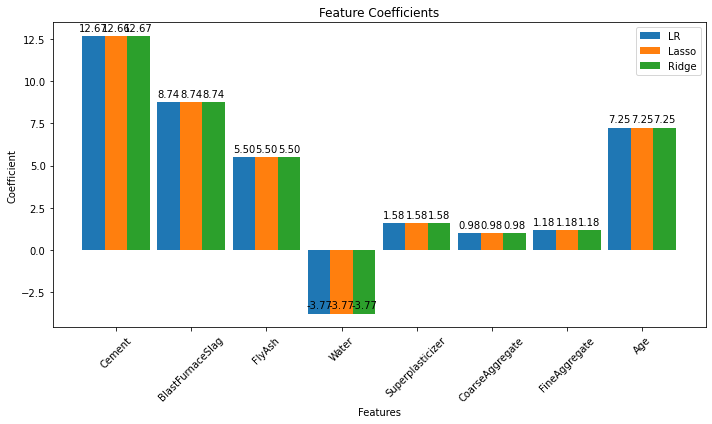

In [216]:
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr,    width, label='LR')
rects2 = ax.bar(x              , coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

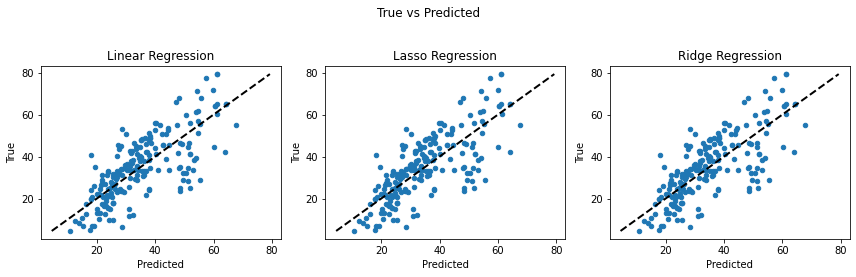

In [217]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

The plots look identical, because they are (mostly).  Now repeat but adjust the lambdas to improve "fits" 

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.32 		 106.50 	8.28 		0.57
RidgeRegression 	 10.32 		 106.56 	8.29 		0.57


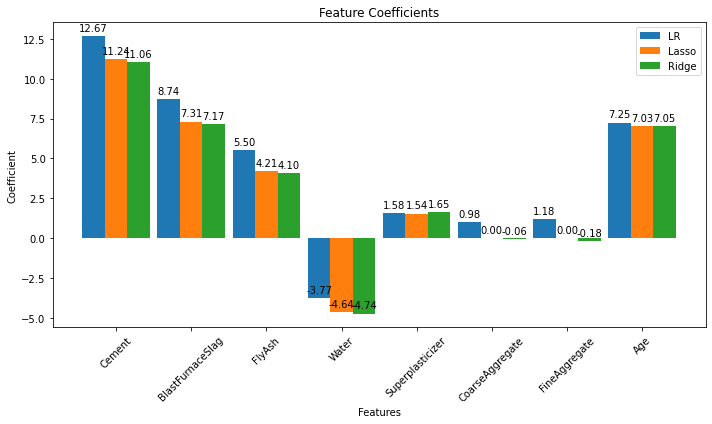

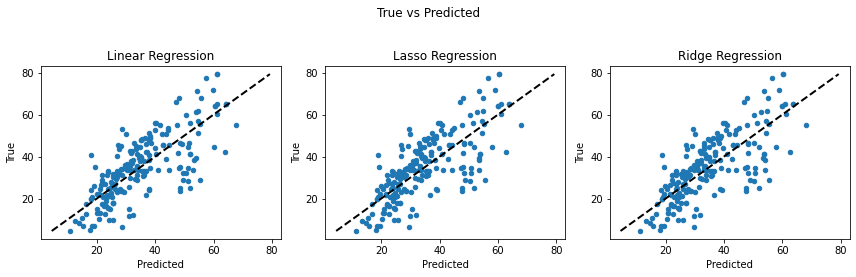

In [218]:
# All in one cell fitting and updating
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso(alpha=0.1) #alpha is the lambda weight close to 0 is ordinary linear regression
# Ridge Regression
ridge = Ridge(alpha=10.1)  #alpha is the lambda weight close to 0 is ordinary linear regression

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = req_col_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr,    width, label='LR')
rects2 = ax.bar(x              , coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)

Notice that it appears we can eliminate the aggregate features without much of a performance loss.  Naturally an automated approach would be preferred.

# Weighted Least Squares

[Weighted Least Squares API notes](https://scipython.com/book/chapter-8-scipy/examples/weighted-and-non-weighted-least-squares-fitting/)

Consider where we used linear algebra to construct OLS regressions

$\mathbf{X^T}\mathbf{Y}=\mathbf{X^T}\mathbf{X}\mathbf{\beta}$ 

If we were to insert an identy matrix (1s on the diagonal, 0s elsewhere) we could write:

$\mathbf{X^T}\mathbf{I}\mathbf{Y}=\mathbf{X^T}\mathbf{I}\mathbf{X}\mathbf{\beta}$  and there is no change.

The result is 

$\mathbf{\beta}=(\mathbf{X^TI}\mathbf{XI})^{-1}\mathbf{X^TI}\mathbf{Y}$ 

However if the identity matrix no longer contains 1 on the diagional but other values the result is called weighted leats squares.  It looks a little like ridge regression but the weigths are imposed before the transpose-multiply step

[WLS Statsmodel API notes](https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html)

First figure out the API syntax, then try on our Concrete Data

In [219]:
# copy/adapted from https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html


from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[int(nsample * 6/10):] = 3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
X = X[:,[0,1]]

mod_wls = sm.WLS(y, X, weights=1./w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            WLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     487.9
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           8.52e-27
Time:                        17:16:09   Log-Likelihood:                -57.048
No. Observations:                  50   AIC:                             118.1
Df Residuals:                      48   BIC:                             121.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2726      0.185     28.488      0.0

[5.24256099 0.43486879]
[5.27260714 0.43794441]


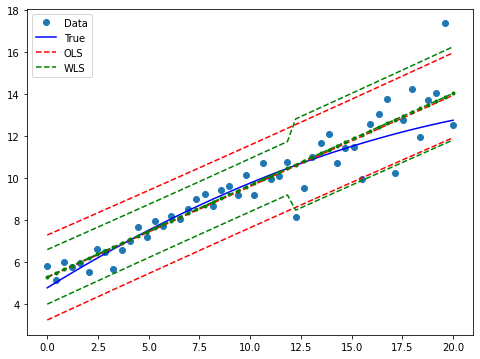

In [220]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)
prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)
prstd, iv_l, iv_u = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u, 'g--', label="WLS")
ax.plot(x, iv_l, 'g--')
ax.legend(loc="best");

Now concrete data

In [222]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

# we need to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# now scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# set the weights
w = np.ones(len(X_train))   # This will be OLS until we change the weights
# Now attempt a fit
mod_wls = sm.WLS(y_train, X_train, weights=w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:            CC_Strength   R-squared (uncentered):                   0.113
Model:                            WLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              13.03
Date:                Fri, 21 Oct 2022   Prob (F-statistic):                    8.82e-18
Time:                        17:16:48   Log-Likelihood:                         -4154.2
No. Observations:                 824   AIC:                                      8324.
Df Residuals:                     816   BIC:                                      8362.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [223]:
#WLS values
print(res_wls.params)

x1    12.665022
x2     8.741348
x3     5.502169
x4    -3.768875
x5     1.575109
x6     0.981221
x7     1.178070
x8     7.248813
dtype: float64


In [224]:
# OLS values
print(lr.coef_)

[12.665022    8.741348    5.50216877 -3.76887495  1.57510915  0.98122091
  1.17807011  7.24881284]


## References
1. Chan, Jamie. Machine Learning With Python For Beginners: A Step-By-Step Guide with Hands-On Projects (Learn Coding Fast with Hands-On Project Book 7) (p. 2). Kindle Edition. 

2. [Weighted Least Squares (Wikipedia)](https://en.wikipedia.org/wiki/Weighted_least_squares)

In [ ]:
w[0:30]=30.0*31

In [ ]:
w